In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [9]:
df['degree'] = df['degree'].map({'bachelors':1,'masters':2})
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,1,0
1,google,sales executive,2,0
2,google,business manager,1,1
3,google,business manager,2,1
4,google,computer programmer,1,0


In [11]:
df_encoded = pd.get_dummies(df,columns=['company','job'],drop_first=True)
df_encoded.head()

,degree,salary_more_then_100k,company_facebook,company_google,job_computer programmer,job_sales executive
0,1,0,False,True,False,True
1,2,0,False,True,False,True
2,1,1,False,True,False,False
3,2,1,False,True,False,False
4,1,0,False,True,True,False


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



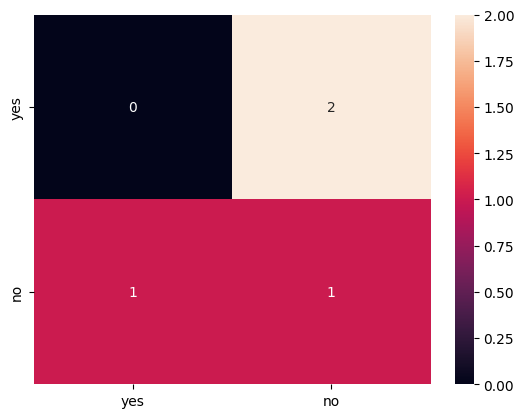

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
X = df_encoded.drop('salary_more_then_100k',axis=1)
y = df_encoded['salary_more_then_100k']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_preds = model.predict(X_test)

print(classification_report(y_test,y_preds))

cm = confusion_matrix(y_test,y_preds)

sns.heatmap(cm,annot=True,xticklabels=['yes','no'],yticklabels=['yes','no']);

In [17]:
from sklearn.tree import export_text
print(export_text(model,feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_computer programmer <= 0.50
|   |   |--- company_google <= 0.50
|   |   |   |--- job_sales executive <= 0.50
|   |   |   |   |--- degree <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- degree >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- job_sales executive >  0.50
|   |   |   |   |--- class: 0
|   |   |--- company_google >  0.50
|   |   |   |--- class: 1
|   |--- job_computer programmer >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



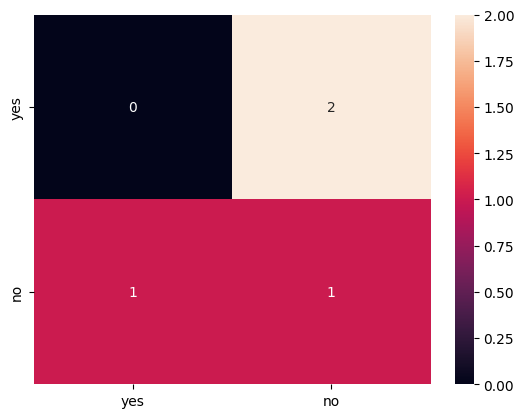

In [18]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

y_preds = model.predict(X_test)

print(classification_report(y_test,y_preds))

cm = confusion_matrix(y_test,y_preds)

sns.heatmap(cm,annot=True,xticklabels=['yes','no'],yticklabels=['yes','no']);

In [19]:
print(export_text(model,feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_computer programmer <= 0.50
|   |   |--- company_google <= 0.50
|   |   |   |--- degree <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- degree >  1.50
|   |   |   |   |--- job_sales executive <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_sales executive >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- company_google >  0.50
|   |   |   |--- class: 1
|   |--- job_computer programmer >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1

